# Lab 4 Plotting Weather Data (intro)

 * Name: Instructor Intro
 * Course: ENGR114
 * Quarter: Winter 2021
 * Date: 2021-01-27

#### Ensure the .xlsx data file is in the same location as this running Jupyter notebook

In [1]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 1236-A93E

 Directory of C:\Users\peter.kazarinoff\Documents\ENGR114-2021Q1\class_notes\week_4

01/27/2021  12:04 PM    <DIR>          .
01/27/2021  12:04 PM    <DIR>          ..
01/27/2021  11:16 AM    <DIR>          .ipynb_checkpoints
01/27/2021  11:08 AM            30,579 4-subplots.png
01/27/2021  09:15 AM             1,449 Agenda_week_4.ipynb
01/25/2021  12:08 PM            11,114 bar_plot.png
01/27/2021  11:08 AM            19,786 bond_energy_vs_distance.png
01/27/2021  11:10 AM            57,586 govt_camp_2013_01_to_2016_03.xlsx
01/27/2021  11:08 AM             8,442 historgram.png
01/27/2021  12:04 PM            45,536 lab4_intro.ipynb
01/27/2021  12:04 PM            24,095 lab4_line_plot.png
01/25/2021  12:08 PM            14,776 pie_chart.png
01/25/2021  12:08 PM           168,384 plot_of_sin_and_cos.png
01/25/2021  12:09 PM            98,673 week_4_notes_fstrings_arrays_plotting.ipynb
01/27/2021  11:08 AM            95,307 we

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import the .xlsx data into the notebook and save it as a dataframe

In [3]:
df = pd.read_excel('govt_camp_2013_01_to_2016_03.xlsx')
df.head()

,STATION,STATION_NAME,DATE,Precipitation\n(inches),Snow Depth\n(inches),Snowfall\n(inches),Max Temp (°F),Min Temp (°F)
0,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130101,0.00,44,0.0,29,12
1,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130102,0.01,42,0.0,27,11
2,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130103,0.00,42,0.0,20,12
3,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130104,0.16,41,0.0,31,14
4,GHCND:USC00353402,GOVERNMENT CAMP OR US,20130105,0.00,41,0.0,37,28


## Clean up the data so that we have columns for: year, month, date, precip, snow depth, snow fall, max temp, min temp

In [4]:
# drop the STATION and STATION_NAME columns
df.drop(['STATION', 'STATION_NAME'], axis=1, inplace=True)
df.head()

,DATE,Precipitation\n(inches),Snow Depth\n(inches),Snowfall\n(inches),Max Temp (°F),Min Temp (°F)
0,20130101,0.00,44,0.0,29,12
1,20130102,0.01,42,0.0,27,11
2,20130103,0.00,42,0.0,20,12
3,20130104,0.16,41,0.0,31,14
4,20130105,0.00,41,0.0,37,28


In [5]:
# divide the date column into 3 columns: year, month, date
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
df.insert(0, 'year', pd.DatetimeIndex(df['DATE']).year)
df.insert(1, 'month', pd.DatetimeIndex(df['DATE']).month)
df.insert(2, 'day', pd.DatetimeIndex(df['DATE']).day)
df.drop(['DATE'], axis=1, inplace=True)
print(df.shape)
df.head()

(1186, 8)


,year,month,day,Precipitation\n(inches),Snow Depth\n(inches),Snowfall\n(inches),Max Temp (°F),Min Temp (°F)
0,2013,1,1,0.00,44,0.0,29,12
1,2013,1,2,0.01,42,0.0,27,11
2,2013,1,3,0.00,42,0.0,20,12
3,2013,1,4,0.16,41,0.0,31,14
4,2013,1,5,0.00,41,0.0,37,28


In [6]:
# convert the dataframe df into a NumPy array wd
wd = np.array(df)
print(wd)

[[2.013e+03 1.000e+00 1.000e+00 ... 0.000e+00 2.900e+01 1.200e+01]
 [2.013e+03 1.000e+00 2.000e+00 ... 0.000e+00 2.700e+01 1.100e+01]
 [2.013e+03 1.000e+00 3.000e+00 ... 0.000e+00 2.000e+01 1.200e+01]
 ...
 [2.016e+03 3.000e+00 2.900e+01 ... 0.000e+00 3.300e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.000e+01 ... 0.000e+00 4.700e+01 2.700e+01]
 [2.016e+03 3.000e+00 3.100e+01 ... 0.000e+00 5.900e+01 3.200e+01]]


## Line Plot

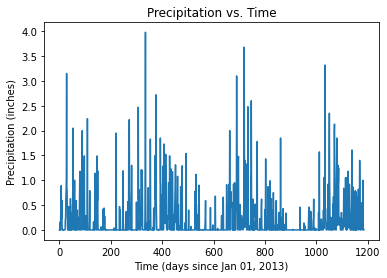

In [7]:
# imports (already complete)

# data
precip = wd[:,3]   # all rows, column index 3 is the column for precipitation

# create fig, ax objects
fig, ax = plt.subplots()

# plot the data
ax.plot(precip)

# customize plot
ax.set_title('Precipitation vs. Time')
ax.set_xlabel('Time (days since Jan 01, 2013)')
ax.set_ylabel('Precipitation (inches)')

# save and show the plot
plt.savefig('lab4_line_plot.png', dpi=72)
plt.show()